In [374]:
import pandas as pd

In [375]:
import re

In [376]:
from bs4 import BeautifulSoup

In [377]:
total=pd.read_csv(r'/content/state_wise_daily.csv')

In [378]:
total.columns

Index(['Date', 'Date_YMD', 'Status', 'TT', 'AN', 'AP', 'AR', 'AS', 'BR', 'CH',
       'CT', 'DN', 'DD', 'DL', 'GA', 'GJ', 'HR', 'HP', 'JK', 'JH', 'KA', 'KL',
       'LA', 'LD', 'MP', 'MH', 'MN', 'ML', 'MZ', 'NL', 'OR', 'PY', 'PB', 'RJ',
       'SK', 'TN', 'TG', 'TR', 'UP', 'UT', 'WB', 'UN'],
      dtype='object')

In [379]:
confirmed=pd.DataFrame(columns=total.columns)

In [380]:
i=0
while i<=(len(total['TT'])):
    confirmed=confirmed.append(total[i:i+1])
    i=i+3

In [381]:
confirmed.head()

,Date,Date_YMD,Status,TT,AN,AP,AR,AS,BR,CH,CT,DN,DD,DL,GA,GJ,HR,HP,JK,JH,KA,KL,LA,LD,MP,MH,MN,ML,MZ,NL,OR,PY,PB,RJ,SK,TN,TG,TR,UP,UT,WB,UN
0,14-Mar-20,2020-03-14,Confirmed,81,0,1,0,0,0,0,0,0,0,7,0,0,14,0,2,0,6,19,0,0,0,14,0,0,0,0,0,0,1,3,0,1,1,0,12,0,0,0
3,15-Mar-20,2020-03-15,Confirmed,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,18,0,0,0,0,0,0,0,1,0,0,2,0,1,0,0,0
6,16-Mar-20,2020-03-16,Confirmed,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,3,0,0,0,6,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0
9,17-Mar-20,2020-03-17,Confirmed,11,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,2,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,1,0,2,0,1,0
12,18-Mar-20,2020-03-18,Confirmed,37,0,0,0,0,0,0,0,0,0,2,0,0,1,0,1,0,5,0,8,0,0,3,0,0,0,0,1,0,1,3,0,1,8,0,2,1,0,0


In [382]:
total.head()

,Date,Date_YMD,Status,TT,AN,AP,AR,AS,BR,CH,CT,DN,DD,DL,GA,GJ,HR,HP,JK,JH,KA,KL,LA,LD,MP,MH,MN,ML,MZ,NL,OR,PY,PB,RJ,SK,TN,TG,TR,UP,UT,WB,UN
0,14-Mar-20,2020-03-14,Confirmed,81,0,1,0,0,0,0,0,0,0,7,0,0,14,0,2,0,6,19,0,0,0,14,0,0,0,0,0,0,1,3,0,1,1,0,12,0,0,0
1,14-Mar-20,2020-03-14,Recovered,9,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,4,0,0,0
2,14-Mar-20,2020-03-14,Deceased,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,15-Mar-20,2020-03-15,Confirmed,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,18,0,0,0,0,0,0,0,1,0,0,2,0,1,0,0,0
4,15-Mar-20,2020-03-15,Recovered,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0


In [383]:
confirmed.to_csv(r'/content/result(2).csv',index=False)

In [384]:
confirmed=pd.read_csv(r'/content/result(2).csv')
confirmed1=pd.read_csv(r'/content/result(2).csv')

In [385]:
confirmed1=confirmed1.drop(columns=['Status'])

In [386]:
confirmed=confirmed.drop(columns=['Status'])

In [387]:
confirmed.head()

,Date,Date_YMD,TT,AN,AP,AR,AS,BR,CH,CT,DN,DD,DL,GA,GJ,HR,HP,JK,JH,KA,KL,LA,LD,MP,MH,MN,ML,MZ,NL,OR,PY,PB,RJ,SK,TN,TG,TR,UP,UT,WB,UN
0,14-Mar-20,2020-03-14,81,0,1,0,0,0,0,0,0,0,7,0,0,14,0,2,0,6,19,0,0,0,14,0,0,0,0,0,0,1,3,0,1,1,0,12,0,0,0
1,15-Mar-20,2020-03-15,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,18,0,0,0,0,0,0,0,1,0,0,2,0,1,0,0,0
2,16-Mar-20,2020-03-16,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,3,0,0,0,6,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0
3,17-Mar-20,2020-03-17,11,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,2,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,1,0,2,0,1,0
4,18-Mar-20,2020-03-18,37,0,0,0,0,0,0,0,0,0,2,0,0,1,0,1,0,5,0,8,0,0,3,0,0,0,0,1,0,1,3,0,1,8,0,2,1,0,0


In [388]:
confirmed.columns=confirmed1.columns
b=confirmed.columns
for i in range(2,len(b)):
    a=list(confirmed[b[i]])
    for j in range(1,len(a)):
        a[j]=a[j]+a[j-1]
    confirmed[b[i]]=a

In [389]:
confirmed.head()

,Date,Date_YMD,TT,AN,AP,AR,AS,BR,CH,CT,DN,DD,DL,GA,GJ,HR,HP,JK,JH,KA,KL,LA,LD,MP,MH,MN,ML,MZ,NL,OR,PY,PB,RJ,SK,TN,TG,TR,UP,UT,WB,UN
0,14-Mar-20,2020-03-14,81,0,1,0,0,0,0,0,0,0,7,0,0,14,0,2,0,6,19,0,0,0,14,0,0,0,0,0,0,1,3,0,1,1,0,12,0,0,0
1,15-Mar-20,2020-03-15,108,0,1,0,0,0,0,0,0,0,7,0,0,14,0,2,0,6,24,0,0,0,32,0,0,0,0,0,0,1,4,0,1,3,0,13,0,0,0
2,16-Mar-20,2020-03-16,123,0,1,0,0,0,0,0,0,0,7,0,0,14,0,3,0,7,27,0,0,0,38,0,0,0,0,1,1,1,4,0,1,4,0,13,1,0,0
3,17-Mar-20,2020-03-17,134,0,1,0,0,0,0,0,0,0,8,0,0,15,0,3,0,9,27,0,0,0,41,0,0,0,0,1,1,1,4,0,1,5,0,15,1,1,0
4,18-Mar-20,2020-03-18,171,0,1,0,0,0,0,0,0,0,10,0,0,16,0,4,0,14,27,8,0,0,44,0,0,0,0,2,1,2,7,0,2,13,0,17,2,1,0


In [390]:
confirmed.describe()

,TT,AN,AP,AR,AS,BR,CH,CT,DN,DD,DL,GA,GJ,HR,HP,JK,JH,KA,KL,LA,LD,MP,MH,MN,ML,MZ,NL,OR,PY,PB,RJ,SK,TN,TG,TR,UP,UT,WB,UN
count,5.340000e+02,534.000000,5.340000e+02,534.000000,534.000000,534.000000,534.000000,5.340000e+02,534.000000,534.0,5.340000e+02,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,5.340000e+02,5.340000e+02,534.000000,534.000000,534.000000,5.340000e+02,534.000000,534.000000,534.000000,534.000000,5.340000e+02,534.000000,534.000000,534.000000,534.000000,5.340000e+02,534.000000,534.000000,5.340000e+02,534.000000,5.340000e+02,534.000000
mean,1.136058e+07,3895.968165,8.060397e+05,15289.086142,207663.312734,276306.692884,22587.887640,3.424273e+05,4016.715356,0.0,5.890421e+05,59039.385768,297975.621723,278996.146067,64145.207865,120362.149813,128687.749064,1.019940e+06,9.942283e+05,8320.951311,2081.990637,283647.363296,2.340118e+06,27543.297753,16341.430712,7334.020599,10468.164794,3.354082e+05,41945.563670,208552.346442,338014.189139,7010.282772,9.012657e+05,266622.677903,29081.473783,6.462698e+05,111704.722846,5.475642e+05,645.955056
std,1.079336e+07,2653.387631,6.477367e+05,14368.487992,175781.775130,252515.619741,22433.128988,3.703537e+05,3632.961493,0.0,5.140184e+05,58922.187552,293637.384099,275602.941427,74083.971022,108832.609734,123277.814467,9.906773e+05,1.149913e+06,7024.048758,3731.823510,287023.518630,2.188266e+06,29422.719254,20169.799620,12039.509298,8990.217811,3.178662e+05,40641.298039,212476.663114,342271.538579,8195.463173,8.290622e+05,216301.183410,23883.849839,6.112243e+05,122502.035983,5.233702e+05,2018.851611
min,8.100000e+01,0.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.0,7.000000e+00,0.000000,0.000000,14.000000,0.000000,2.000000,0.000000,6.000000e+00,1.900000e+01,0.000000,0.000000,0.000000,1.400000e+01,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,3.000000,0.000000,1.000000e+00,1.000000,0.000000,1.200000e+01,0.000000,0.000000e+00,0.000000
25%,1.399215e+06,293.000000,9.057775e+04,1134.000000,31270.500000,36965.250000,860.750000,7.289750e+03,915.250000,0.0,1.297998e+05,4729.750000,54989.500000,30736.500000,2080.750000,17458.750000,7968.000000,9.224175e+04,1.833075e+04,1278.250000,0.000000,27144.500000,3.687258e+05,2190.750000,660.000000,361.000000,1301.500000,2.435700e+04,2689.250000,12817.500000,35581.000000,523.500000,2.084835e+05,54059.000000,3891.250000,6.455350e+04,5996.750000,5.696225e+04,0.000000
50%,9.660401e+06,4748.500000,8.716385e+05,16389.500000,213608.500000,238833.500000,17976.500000,2.461945e+05,3332.500000,0.0,5.908970e+05,48630.000000,218059.500000,243147.000000,44681.500000,113022.500000,110207.000000,8.923455e+05,6.340045e+05,8866.500000,0.000000,213777.500000,1.849888e+06,25965.000000,12152.500000,3923.500000,11322.500000,3.209995e+05,37228.500000,155825.000000,279540.500000,5195.000000,7.895800e+05,272520.000000,32872.500000,5.539780e+05,77785.000000,5.012685e+05,0.000000
75%,1.498840e+07,5371.250000,9.603915e+05,16982.000000,224193.250000,321944.500000,33777.750000,5.417538e+05,4811.000000,0.0,8.470945e+05,66974.250000,401983.000000,355176.750000,76178.000000,146310.500000,161921.000000,1.156298e+06,1.234861e+06,12116.000000,1136.500000,405018.000000,3.822180e+06,29697.000000,14803.250000,4846.500000,12513.250000,3.673420e+05,47607.250000,298813.000000,412051.500000,6683.750000,9.887702e+05,349640.750000,33981.750000,8.439785e+05,123375.500000,6.578222e+05,0.000000
max,3.273671e+07,7560.000000,2.012123e+06,52871.000000,588216.000000,725694.000000,65093.000000,1.004398e+06,10526.000000,0.0,1.437716e+06,173791.000000,825397.000000,770456.000000,213245.000000,325148.000000,347816.000000,2.947255e+06,4.007408e+06,20547.000000,10338.000000,792155.000000,6.456939e+06,113473.000000,75553.000000,57522.000000,29935.000000,1.006503e+06,123396.000000,600551.000000,954086.000000,29823.000000,2.611837e+06,656866.000000,82772.000000,1.709248e+06,342910.000000,1.547548e+06,9265.000000


In [391]:
confirmed.head()

,Date,Date_YMD,TT,AN,AP,AR,AS,BR,CH,CT,DN,DD,DL,GA,GJ,HR,HP,JK,JH,KA,KL,LA,LD,MP,MH,MN,ML,MZ,NL,OR,PY,PB,RJ,SK,TN,TG,TR,UP,UT,WB,UN
0,14-Mar-20,2020-03-14,81,0,1,0,0,0,0,0,0,0,7,0,0,14,0,2,0,6,19,0,0,0,14,0,0,0,0,0,0,1,3,0,1,1,0,12,0,0,0
1,15-Mar-20,2020-03-15,108,0,1,0,0,0,0,0,0,0,7,0,0,14,0,2,0,6,24,0,0,0,32,0,0,0,0,0,0,1,4,0,1,3,0,13,0,0,0
2,16-Mar-20,2020-03-16,123,0,1,0,0,0,0,0,0,0,7,0,0,14,0,3,0,7,27,0,0,0,38,0,0,0,0,1,1,1,4,0,1,4,0,13,1,0,0
3,17-Mar-20,2020-03-17,134,0,1,0,0,0,0,0,0,0,8,0,0,15,0,3,0,9,27,0,0,0,41,0,0,0,0,1,1,1,4,0,1,5,0,15,1,1,0
4,18-Mar-20,2020-03-18,171,0,1,0,0,0,0,0,0,0,10,0,0,16,0,4,0,14,27,8,0,0,44,0,0,0,0,2,1,2,7,0,2,13,0,17,2,1,0


In [392]:
new=confirmed

In [393]:
date=list(new['Date'])
date

['14-Mar-20',
 '15-Mar-20',
 '16-Mar-20',
 '17-Mar-20',
 '18-Mar-20',
 '19-Mar-20',
 '20-Mar-20',
 '21-Mar-20',
 '22-Mar-20',
 '23-Mar-20',
 '24-Mar-20',
 '25-Mar-20',
 '26-Mar-20',
 '27-Mar-20',
 '28-Mar-20',
 '29-Mar-20',
 '30-Mar-20',
 '31-Mar-20',
 '01-Apr-20',
 '02-Apr-20',
 '03-Apr-20',
 '04-Apr-20',
 '05-Apr-20',
 '06-Apr-20',
 '07-Apr-20',
 '08-Apr-20',
 '09-Apr-20',
 '10-Apr-20',
 '11-Apr-20',
 '12-Apr-20',
 '13-Apr-20',
 '14-Apr-20',
 '15-Apr-20',
 '16-Apr-20',
 '17-Apr-20',
 '18-Apr-20',
 '19-Apr-20',
 '20-Apr-20',
 '21-Apr-20',
 '22-Apr-20',
 '23-Apr-20',
 '24-Apr-20',
 '25-Apr-20',
 '26-Apr-20',
 '27-Apr-20',
 '28-Apr-20',
 '29-Apr-20',
 '30-Apr-20',
 '01-May-20',
 '02-May-20',
 '03-May-20',
 '04-May-20',
 '05-May-20',
 '06-May-20',
 '07-May-20',
 '08-May-20',
 '09-May-20',
 '10-May-20',
 '11-May-20',
 '12-May-20',
 '13-May-20',
 '14-May-20',
 '15-May-20',
 '16-May-20',
 '17-May-20',
 '18-May-20',
 '19-May-20',
 '20-May-20',
 '21-May-20',
 '22-May-20',
 '23-May-20',
 '24-M

In [394]:
def clean1(da):
    da=BeautifulSoup(da,'lxml').get_text()
    da=re.sub(r'-Mar[A-Za-z0-9.-]+',' 3',da)
    da=re.sub(r'-Ap[A-Za-z0-9.-]+',' 4',da)
    da=re.sub(r'-May[A-Za-z0-9.-]+',' 5',da)
    da=re.sub(r'-Jun[A-Za-z0-9.-]+',' 6',da)
    da=re.sub(r'-Jul[A-Za-z0-9.-]+',' 7',da)
    da=re.sub(r'-Aug[A-Za-z0-9.-]+',' 8',da)
    da=re.sub(r'-Sep[A-Za-z0-9.-]+',' 9',da)
    mo=da.split()
    if mo[1]=='3':
        mo[0]=int(mo[0])+60
    if mo[1]=='4':
        mo[0]=int(mo[0])+91
    if mo[1]=='5':
        mo[0]=int(mo[0])+121
    if mo[1]=='6':
        mo[0]=int(mo[0])+152
    if mo[1]=='7':
        mo[0]=int(mo[0])+182
    if mo[1]=='8':
        mo[0]=int(mo[0])+213
    if mo[1]=='9':
        mo[0]=int(mo[0])+244
    return mo[0]

In [395]:
for i in range(len(date)):
    date[i]=i+75

In [396]:
new['Date']=date

In [397]:
date=list(new['Date'])
date

[75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 193,
 194,
 195,
 196,
 197,
 198,
 199,
 200,
 201,
 202,
 203,
 204,
 205,
 206,
 207,
 208,
 209,
 210,
 211,
 212,
 213,
 214,
 215,
 216,
 217,
 218,
 219,
 220,
 221,
 222,
 223,
 224,
 225,
 226,
 227,
 228,
 229,
 230,
 231,
 232,
 233,
 234,
 235,
 236,
 237,
 238,
 239,
 240,
 241,
 242,
 243,
 244,
 245,

In [398]:
new.tail(60)

,Date,Date_YMD,TT,AN,AP,AR,AS,BR,CH,CT,DN,DD,DL,GA,GJ,HR,HP,JK,JH,KA,KL,LA,LD,MP,MH,MN,ML,MZ,NL,OR,PY,PB,RJ,SK,TN,TG,TR,UP,UT,WB,UN
474,549,2021-07-01,30456689,7465,1893354,36169,511051,722101,61687,994890,10424,0,1434281,166920,823606,768724,202290,315960,345680,2847013,2937034,20090,9808,789844,6070599,70292,50042,20492,25268,912887,117467,595899,952497,20680,2484177,623869,66217,1706252,340379,1501284,0
475,550,2021-07-02,30500876,7471,1896818,36573,513504,722282,61700,995195,10428,0,1434374,167103,823686,768800,202440,316291,345768,2849997,2949129,20101,9843,789887,6079352,70948,50527,20770,25345,916109,117642,596094,952573,20791,2488407,624727,66626,1706384,340488,1502706,0
476,551,2021-07-03,30543903,7474,1899748,36938,515879,722418,61718,995489,10430,0,1434460,167272,823762,768852,202555,316629,345859,2852079,2961585,20115,9861,789936,6088841,71637,50987,21003,25414,919026,117789,596265,952663,20969,2492420,625575,67020,1706495,340646,1504097,0
477,552,2021-07-04,30584053,7478,1902923,37106,517092,722527,61728,995718,10432,0,1434554,167436,823832,768903,202642,316976,345911,2853643,2973685,20120,9900,789983,6098177,72280,51476,21246,25482,921896,117961,596416,952734,21145,2496287,626180,67448,1706621,340724,1505394,0
478,553,2021-07-05,30618079,7478,1905023,37532,519732,722603,61740,996037,10432,0,1434608,167566,823894,768957,202800,317250,345957,2856491,2981722,20129,9936,790015,6104917,72712,51853,21334,25522,924699,118089,596550,952789,21240,2500002,626988,67674,1706739,340793,1506279,0
479,554,2021-07-06,30662043,7483,1908065,37880,522165,722746,61752,996359,10438,0,1434687,167823,823963,769030,202945,317481,346012,2859595,2996094,20137,9947,790042,6113335,73575,52310,21854,25582,927186,118229,596736,952836,21417,2503481,627772,68148,1706818,340882,1507241,0
480,555,2021-07-07,30707744,7487,1911231,38284,524454,722850,61780,996689,10441,0,1434780,168015,824028,769093,203117,317761,346087,2862338,3011694,20143,9965,790070,6122893,74335,52664,22155,25626,929788,118418,596970,952887,21587,2506848,628544,68609,1706934,340959,1508223,0
481,556,2021-07-08,30751248,7488,1914213,38683,527098,722965,61794,997035,10442,0,1434873,168210,824090,769148,203245,318023,346142,2864868,3025466,20155,9980,790096,6131976,75174,53196,22703,25690,932330,118573,597195,952956,21809,2510059,629275,69016,1707044,341023,1509218,0
482,557,2021-07-09,30793908,7488,1917253,39086,529591,723060,61811,997426,10443,0,1434954,168430,824146,769205,203425,318284,346197,2867158,3039029,20167,10002,790125,6140968,76026,53622,23014,25750,935136,118699,597347,953018,21979,2513098,630004,69547,1707127,341088,1510208,0
483,558,2021-07-10,30835402,7488,1920178,39564,531982,723147,61823,997785,10447,0,1435030,168585,824199,769243,203563,318469,346253,2869320,3053116,20186,10011,790152,6149264,76814,54107,23551,25861,937470,118833,597469,953074,22177,2516011,630708,69958,1707225,341137,1511205,0


In [399]:
new.to_csv('/content/result(1).csv',index=False)

In [400]:
import pandas as pd

In [401]:
new=pd.read_csv(r'/content/result(1).csv')

In [402]:
new.columns

Index(['Date', 'Date_YMD', 'TT', 'AN', 'AP', 'AR', 'AS', 'BR', 'CH', 'CT',
       'DN', 'DD', 'DL', 'GA', 'GJ', 'HR', 'HP', 'JK', 'JH', 'KA', 'KL', 'LA',
       'LD', 'MP', 'MH', 'MN', 'ML', 'MZ', 'NL', 'OR', 'PY', 'PB', 'RJ', 'SK',
       'TN', 'TG', 'TR', 'UP', 'UT', 'WB', 'UN'],
      dtype='object')

In [403]:
org=pd.read_csv(r'/content/result(2).csv')
org['Date_YMD'][0]
org.columns


Index(['Date', 'Date_YMD', 'Status', 'TT', 'AN', 'AP', 'AR', 'AS', 'BR', 'CH',
       'CT', 'DN', 'DD', 'DL', 'GA', 'GJ', 'HR', 'HP', 'JK', 'JH', 'KA', 'KL',
       'LA', 'LD', 'MP', 'MH', 'MN', 'ML', 'MZ', 'NL', 'OR', 'PY', 'PB', 'RJ',
       'SK', 'TN', 'TG', 'TR', 'UP', 'UT', 'WB', 'UN'],
      dtype='object')

In [404]:
new.describe()

,Date,TT,AN,AP,AR,AS,BR,CH,CT,DN,DD,DL,GA,GJ,HR,HP,JK,JH,KA,KL,LA,LD,MP,MH,MN,ML,MZ,NL,OR,PY,PB,RJ,SK,TN,TG,TR,UP,UT,WB,UN
count,534.000000,5.340000e+02,534.000000,5.340000e+02,534.000000,534.000000,534.000000,534.000000,5.340000e+02,534.000000,534.0,5.340000e+02,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,5.340000e+02,5.340000e+02,534.000000,534.000000,534.000000,5.340000e+02,534.000000,534.000000,534.000000,534.000000,5.340000e+02,534.000000,534.000000,534.000000,534.000000,5.340000e+02,534.000000,534.000000,5.340000e+02,534.000000,5.340000e+02,534.000000
mean,341.500000,1.136058e+07,3895.968165,8.060397e+05,15289.086142,207663.312734,276306.692884,22587.887640,3.424273e+05,4016.715356,0.0,5.890421e+05,59039.385768,297975.621723,278996.146067,64145.207865,120362.149813,128687.749064,1.019940e+06,9.942283e+05,8320.951311,2081.990637,283647.363296,2.340118e+06,27543.297753,16341.430712,7334.020599,10468.164794,3.354082e+05,41945.563670,208552.346442,338014.189139,7010.282772,9.012657e+05,266622.677903,29081.473783,6.462698e+05,111704.722846,5.475642e+05,645.955056
std,154.296792,1.079336e+07,2653.387631,6.477367e+05,14368.487992,175781.775130,252515.619741,22433.128988,3.703537e+05,3632.961493,0.0,5.140184e+05,58922.187552,293637.384099,275602.941427,74083.971022,108832.609734,123277.814467,9.906773e+05,1.149913e+06,7024.048758,3731.823510,287023.518630,2.188266e+06,29422.719254,20169.799620,12039.509298,8990.217811,3.178662e+05,40641.298039,212476.663114,342271.538579,8195.463173,8.290622e+05,216301.183410,23883.849839,6.112243e+05,122502.035983,5.233702e+05,2018.851611
min,75.000000,8.100000e+01,0.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.0,7.000000e+00,0.000000,0.000000,14.000000,0.000000,2.000000,0.000000,6.000000e+00,1.900000e+01,0.000000,0.000000,0.000000,1.400000e+01,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,3.000000,0.000000,1.000000e+00,1.000000,0.000000,1.200000e+01,0.000000,0.000000e+00,0.000000
25%,208.250000,1.399215e+06,293.000000,9.057775e+04,1134.000000,31270.500000,36965.250000,860.750000,7.289750e+03,915.250000,0.0,1.297998e+05,4729.750000,54989.500000,30736.500000,2080.750000,17458.750000,7968.000000,9.224175e+04,1.833075e+04,1278.250000,0.000000,27144.500000,3.687258e+05,2190.750000,660.000000,361.000000,1301.500000,2.435700e+04,2689.250000,12817.500000,35581.000000,523.500000,2.084835e+05,54059.000000,3891.250000,6.455350e+04,5996.750000,5.696225e+04,0.000000
50%,341.500000,9.660401e+06,4748.500000,8.716385e+05,16389.500000,213608.500000,238833.500000,17976.500000,2.461945e+05,3332.500000,0.0,5.908970e+05,48630.000000,218059.500000,243147.000000,44681.500000,113022.500000,110207.000000,8.923455e+05,6.340045e+05,8866.500000,0.000000,213777.500000,1.849888e+06,25965.000000,12152.500000,3923.500000,11322.500000,3.209995e+05,37228.500000,155825.000000,279540.500000,5195.000000,7.895800e+05,272520.000000,32872.500000,5.539780e+05,77785.000000,5.012685e+05,0.000000
75%,474.750000,1.498840e+07,5371.250000,9.603915e+05,16982.000000,224193.250000,321944.500000,33777.750000,5.417538e+05,4811.000000,0.0,8.470945e+05,66974.250000,401983.000000,355176.750000,76178.000000,146310.500000,161921.000000,1.156298e+06,1.234861e+06,12116.000000,1136.500000,405018.000000,3.822180e+06,29697.000000,14803.250000,4846.500000,12513.250000,3.673420e+05,47607.250000,298813.000000,412051.500000,6683.750000,9.887702e+05,349640.750000,33981.750000,8.439785e+05,123375.500000,6.578222e+05,0.000000
max,608.000000,3.273671e+07,7560.000000,2.012123e+06,52871.000000,588216.000000,725694.000000,65093.000000,1.004398e+06,10526.000000,0.0,1.437716e+06,173791.000000,825397.000000,770456.000000,213245.000000,325148.000000,347816.000000,2.947255e+06,4.007408e+06,20547.000000,10338.000000,792155.000000,6.456939e+06,113473.000000,75553.000000,57522.000000,29935.000000,1.006503e+06,123396.000000,600551.000000,954086.000000,29823.000000,2.611837e+06,656866.000000,82772.

In [405]:
lis=['Date','Andaman And Nicobar', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh', 'Chattisgarh',
       'Daman & Diu', 'Delhi', 'Dardar and Nagar Haveli', 'Goa', 'Gujarath',
       'Himachal Pradesh', 'Haryana', 'Jarkhand', 'Jammu And Kashmir',
       'Karnataka', 'Kerala', 'Ladakh', 'Lakshwadeep', 'Maharashtra',
       'Meghalaya', 'Manipur', 'Madhya Pradesh', 'Mizoram', 'Nagaland',
       'Orissa', 'Punjab', 'Pondicherry', 'Rajasthan', 'Sikkim', 'Telangana',
       'TamilNadu', 'Tripura', 'UttarPradesh', 'Uttarakand', 'WestBengal',
       'un', 'Total']
len(lis)
new.head()

,Date,Date_YMD,TT,AN,AP,AR,AS,BR,CH,CT,DN,DD,DL,GA,GJ,HR,HP,JK,JH,KA,KL,LA,LD,MP,MH,MN,ML,MZ,NL,OR,PY,PB,RJ,SK,TN,TG,TR,UP,UT,WB,UN
0,75,2020-03-14,81,0,1,0,0,0,0,0,0,0,7,0,0,14,0,2,0,6,19,0,0,0,14,0,0,0,0,0,0,1,3,0,1,1,0,12,0,0,0
1,76,2020-03-15,108,0,1,0,0,0,0,0,0,0,7,0,0,14,0,2,0,6,24,0,0,0,32,0,0,0,0,0,0,1,4,0,1,3,0,13,0,0,0
2,77,2020-03-16,123,0,1,0,0,0,0,0,0,0,7,0,0,14,0,3,0,7,27,0,0,0,38,0,0,0,0,1,1,1,4,0,1,4,0,13,1,0,0
3,78,2020-03-17,134,0,1,0,0,0,0,0,0,0,8,0,0,15,0,3,0,9,27,0,0,0,41,0,0,0,0,1,1,1,4,0,1,5,0,15,1,1,0
4,79,2020-03-18,171,0,1,0,0,0,0,0,0,0,10,0,0,16,0,4,0,14,27,8,0,0,44,0,0,0,0,2,1,2,7,0,2,13,0,17,2,1,0


In [406]:
new=new.drop(['Date_YMD'],axis=1)
new

,Date,TT,AN,AP,AR,AS,BR,CH,CT,DN,DD,DL,GA,GJ,HR,HP,JK,JH,KA,KL,LA,LD,MP,MH,MN,ML,MZ,NL,OR,PY,PB,RJ,SK,TN,TG,TR,UP,UT,WB,UN
0,75,81,0,1,0,0,0,0,0,0,0,7,0,0,14,0,2,0,6,19,0,0,0,14,0,0,0,0,0,0,1,3,0,1,1,0,12,0,0,0
1,76,108,0,1,0,0,0,0,0,0,0,7,0,0,14,0,2,0,6,24,0,0,0,32,0,0,0,0,0,0,1,4,0,1,3,0,13,0,0,0
2,77,123,0,1,0,0,0,0,0,0,0,7,0,0,14,0,3,0,7,27,0,0,0,38,0,0,0,0,1,1,1,4,0,1,4,0,13,1,0,0
3,78,134,0,1,0,0,0,0,0,0,0,8,0,0,15,0,3,0,9,27,0,0,0,41,0,0,0,0,1,1,1,4,0,1,5,0,15,1,1,0
4,79,171,0,1,0,0,0,0,0,0,0,10,0,0,16,0,4,0,14,27,8,0,0,44,0,0,0,0,2,1,2,7,0,2,13,0,17,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,604,32556918,7556,2006191,52526,586276,725636,65071,1004282,10523,0,1437550,173434,825346,770395,212458,324546,347737,2942250,3883429,20511,10327,792114,6437680,112120,74538,54057,29681,1003210,123080,600378,954048,29538,2605647,655588,82381,1709182,342818,1544817,0
530,605,32601468,7556,2007730,52635,586838,725651,65077,1004329,10526,0,1437595,173526,825362,770411,212727,324647,347768,2943463,3913506,20518,10328,792120,6442788,112500,74769,54851,29741,1004059,123153,600420,954051,29611,2607206,655945,82495,1709192,342843,1545534,0
531,606,32648274,7556,2009245,52761,587337,725672,65084,1004360,10526,0,1437656,173606,825375,770432,212913,324813,347789,2944764,3946307,20526,10334,792136,6447442,112811,75031,55756,29804,1004875,123233,600463,954068,29653,2608748,656284,82597,1709208,342875,1546237,0
532,607,32693338,7556,2010566,52832,587923,725683,65087,1004379,10526,0,1437685,173717,825385,770445,213122,324979,347803,2945993,3977572,20540,10336,792143,6452273,113086,75288,56644,29883,1005654,123300,600514,954079,29743,2610299,656609,82671,1709234,342894,1546898,0


In [407]:
new.columns=lis 

In [408]:
co=new.columns
len(co)
co[39]

'Total'

In [409]:
new['Total']

0      0
1      0
2      0
3      0
4      0
      ..
529    0
530    0
531    0
532    0
533    0
Name: Total, Length: 534, dtype: int64

In [410]:
new.describe()

,Date,Andaman And Nicobar,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chandigarh,Chattisgarh,Daman & Diu,Delhi,Dardar and Nagar Haveli,Goa,Gujarath,Himachal Pradesh,Haryana,Jarkhand,Jammu And Kashmir,Karnataka,Kerala,Ladakh,Lakshwadeep,Maharashtra,Meghalaya,Manipur,Madhya Pradesh,Mizoram,Nagaland,Orissa,Punjab,Pondicherry,Rajasthan,Sikkim,Telangana,TamilNadu,Tripura,UttarPradesh,Uttarakand,WestBengal,un,Total
count,534.000000,5.340000e+02,534.000000,5.340000e+02,534.000000,534.000000,534.000000,534.000000,5.340000e+02,534.000000,534.0,5.340000e+02,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,5.340000e+02,5.340000e+02,534.000000,534.000000,534.000000,5.340000e+02,534.000000,534.000000,534.000000,534.000000,5.340000e+02,534.000000,534.000000,534.000000,534.000000,5.340000e+02,534.000000,534.000000,5.340000e+02,534.000000,5.340000e+02,534.000000
mean,341.500000,1.136058e+07,3895.968165,8.060397e+05,15289.086142,207663.312734,276306.692884,22587.887640,3.424273e+05,4016.715356,0.0,5.890421e+05,59039.385768,297975.621723,278996.146067,64145.207865,120362.149813,128687.749064,1.019940e+06,9.942283e+05,8320.951311,2081.990637,283647.363296,2.340118e+06,27543.297753,16341.430712,7334.020599,10468.164794,3.354082e+05,41945.563670,208552.346442,338014.189139,7010.282772,9.012657e+05,266622.677903,29081.473783,6.462698e+05,111704.722846,5.475642e+05,645.955056
std,154.296792,1.079336e+07,2653.387631,6.477367e+05,14368.487992,175781.775130,252515.619741,22433.128988,3.703537e+05,3632.961493,0.0,5.140184e+05,58922.187552,293637.384099,275602.941427,74083.971022,108832.609734,123277.814467,9.906773e+05,1.149913e+06,7024.048758,3731.823510,287023.518630,2.188266e+06,29422.719254,20169.799620,12039.509298,8990.217811,3.178662e+05,40641.298039,212476.663114,342271.538579,8195.463173,8.290622e+05,216301.183410,23883.849839,6.112243e+05,122502.035983,5.233702e+05,2018.851611
min,75.000000,8.100000e+01,0.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.0,7.000000e+00,0.000000,0.000000,14.000000,0.000000,2.000000,0.000000,6.000000e+00,1.900000e+01,0.000000,0.000000,0.000000,1.400000e+01,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,3.000000,0.000000,1.000000e+00,1.000000,0.000000,1.200000e+01,0.000000,0.000000e+00,0.000000
25%,208.250000,1.399215e+06,293.000000,9.057775e+04,1134.000000,31270.500000,36965.250000,860.750000,7.289750e+03,915.250000,0.0,1.297998e+05,4729.750000,54989.500000,30736.500000,2080.750000,17458.750000,7968.000000,9.224175e+04,1.833075e+04,1278.250000,0.000000,27144.500000,3.687258e+05,2190.750000,660.000000,361.000000,1301.500000,2.435700e+04,2689.250000,12817.500000,35581.000000,523.500000,2.084835e+05,54059.000000,3891.250000,6.455350e+04,5996.750000,5.696225e+04,0.000000
50%,341.500000,9.660401e+06,4748.500000,8.716385e+05,16389.500000,213608.500000,238833.500000,17976.500000,2.461945e+05,3332.500000,0.0,5.908970e+05,48630.000000,218059.500000,243147.000000,44681.500000,113022.500000,110207.000000,8.923455e+05,6.340045e+05,8866.500000,0.000000,213777.500000,1.849888e+06,25965.000000,12152.500000,3923.500000,11322.500000,3.209995e+05,37228.500000,155825.000000,279540.500000,5195.000000,7.895800e+05,272520.000000,32872.500000,5.539780e+05,77785.000000,5.012685e+05,0.000000
75%,474.750000,1.498840e+07,5371.250000,9.603915e+05,16982.000000,224193.250000,321944.500000,33777.750000,5.417538e+05,4811.000000,0.0,8.470945e+05,66974.250000,401983.000000,355176.750000,76178.000000,146310.500000,161921.000000,1.156298e+06,1.234861e+06,12116.000000,1136.500000,405018.000000,3.822180e+06,29697.000000,14803.250000,4846.500000,12513.250000,3.673420e+05,47607.250000,298813.000000,412051.500000,6683.750000,9.887702e+05,349640.750000,33981.750000,8.439785e+05,123375.500000,6.578222e+05,0.000000
max,608.000000,3.273671e+07,7560.000000,2.012123e+06,52871.000000,588216.000000,725694.000000,65093.000000,1.004398e+06,10526.000000,0.0,1.437716e+06,173791.000000,825397.00000

In [411]:
#{'an':'Andaman And Nicobar','ap': 'Andhra Pradesh','ar' :'Arunachal Pradesh','as'  : 'Assam','br' :'Bihar','ch': 'Chandigarh','ct' :'Chattisgarh','dd': 'Daman & Diu','dl' :'Delhi','dn' : 'Dardar and Nagar Haveli','ga': 'Goa','gj' :'Gujarath','hp' :'Himachal Pradesh','hr' : 'Haryana','jh' :'Jarkhand','jk': 'Jammu And Kashmir','ka': 'Karnataka','kl': 'Kerala','ld' : 'Ladakh','la': 'Lakshwadeep','mh': 'Maharashtra','me': 'Meghalaya','mn': 'Manipur','mp' : 'Madhya Pradesh','mz': 'Mizoram','nl': 'Nagaland','or': 'Orissa','pb': 'Punjab','py' :'Pondicherry','rj': 'Rajasthan','sk': 'Sikkim','tg': 'Telangana','tn': 'TamilNadu','tr' :'Tripura','up' :'UttarPradesh','ut': 'Uttarakand','wb' :'WestBengal','tt': 'Total'}

In [412]:
new['Total']

0      0
1      0
2      0
3      0
4      0
      ..
529    0
530    0
531    0
532    0
533    0
Name: Total, Length: 534, dtype: int64

In [413]:
new['Date']

0       75
1       76
2       77
3       78
4       79
      ... 
529    604
530    605
531    606
532    607
533    608
Name: Date, Length: 534, dtype: int64

In [414]:
list(new['Total'])

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 814,
 1096,
 1403,
 1620,
 1899,
 2338,
 2642,
 2970,
 4013,
 4332,
 4673,
 5043,
 5491,
 5630,
 6414,
 7123,
 7483,
 7610,
 8192,
 8610,
 7837,
 8711,
 9227,
 8931,
 8315,
 7984,
 7436,
 6972,
 7684,
 8273,
 8703,
 8927,
 9265,
 9127,
 7832,
 8015,
 8141,
 8493,
 8123,
 8023,
 7839,
 7285,
 7004,
 6915,
 6832,
 6031,
 4999,
 4629,
 4913,
 5034,
 5018,
 4385,
 4161,
 3416,
 3024,
 2358,
 2179,
 1524,
 1285,
 531,
 163,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [415]:
import matplotlib.pyplot as plt

In [416]:
from sklearn import linear_model
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
a=linear_model.LinearRegression()
new1=np.array(new['Date']).reshape(-1,1)
x1=(np.arange(75,636)).reshape(-1,1)

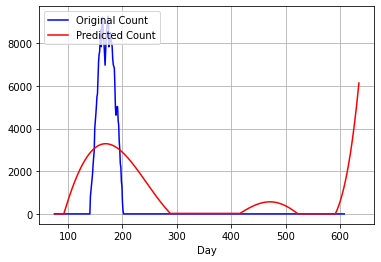

In [417]:
mo=PolynomialFeatures(degree=6)
new2=mo.fit_transform(new1,new['Total'])
xtt=mo.transform(x1)
tt=linear_model.LinearRegression()
tt.fit(new2,new['Total'])
ytt=tt.predict(xtt)
plt.plot(new['Date'],new['Total'],color='blue',label='Original Count')
for i in range(len(ytt)):
    if ytt[i]<0:
        if i==0:
            ytt[i]=0
        else:
            ytt[i]=ytt[i-1]
plt.plot(x1,ytt,color='red',label='Predicted Count')
plt.grid()
plt.xlabel('Day')
plt.legend(loc='upper left')
plt.show()

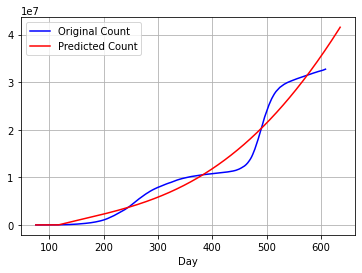

In [418]:
mo=PolynomialFeatures(degree=4)
new2=mo.fit_transform(new1,new['Andaman And Nicobar'])
xan=mo.transform(x1)
an=linear_model.LinearRegression()
an.fit(new2,new['Andaman And Nicobar'])
yan=an.predict(xan)
plt.plot(new['Date'],new['Andaman And Nicobar'],color='blue',label='Original Count')
for i in range(len(yan)):
    if yan[i]<0:
        if i==0:
            yan[i]=0
        else:
            yan[i]=yan[i-1]
plt.plot(x1,yan,color='red',label='Predicted Count')
plt.grid()
plt.xlabel('Day')
plt.legend(loc='upper left')
plt.show()

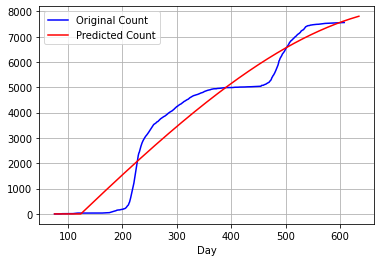

In [419]:
mo=PolynomialFeatures(degree=3)
new2=mo.fit_transform(new1,new['Andhra Pradesh'])
xap=mo.transform(x1)
ap=linear_model.LinearRegression()
ap.fit(new2,new['Andhra Pradesh'])
yap=ap.predict(xap)
plt.plot(new['Date'],new['Andhra Pradesh'],color='blue',label='Original Count')
for i in range(len(yap)):
    if yap[i]<0:
        if i==0:
            yap[i]=0
        else:
            yap[i]=yap[i-1]
plt.plot(x1,yap,color='red',label='Predicted Count')
plt.grid()
plt.xlabel('Day')
plt.legend(loc='upper left')
plt.show()

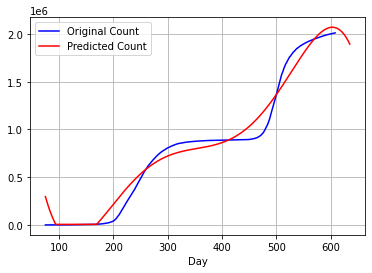

In [420]:
mo=PolynomialFeatures(degree=5)
new2=mo.fit_transform(new1,new['Arunachal Pradesh'])
xar=mo.transform(x1)
ar=linear_model.LinearRegression()
ar.fit(new2,new['Arunachal Pradesh'])
yar=ar.predict(xar)
plt.plot(new['Date'],new['Arunachal Pradesh'],color='blue',label='Original Count')
for i in range(len(yar)):
    if yar[i]<0:
        if i==0:
            yar[i]=0
        else:
            yar[i]=yar[i-1]
plt.plot(x1,yar,color='red',label='Predicted Count')
plt.grid()
plt.xlabel('Day')
plt.legend(loc='upper left')
plt.savefig('/content/ar.png')
plt.show()

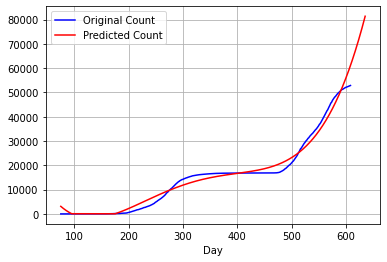

In [421]:
mo=PolynomialFeatures(degree=4)
new2=mo.fit_transform(new1,new['Assam'])
xas1=mo.transform(x1)
as1=linear_model.LinearRegression()
as1.fit(new2,new['Assam'])
yas1=as1.predict(xas1)
plt.plot(new['Date'],new['Assam'],color='blue',label='Original Count')
for i in range(len(yas1)):
    if yas1[i]<0:
        if i==0:
            yas1[i]=0
        else:
            yas1[i]=yas1[i-1]
plt.plot(x1,yas1,color='red',label='Predicted Count')
plt.grid()
plt.xlabel('Day')
plt.legend(loc='upper left')
plt.savefig('/content/as.png')
plt.show()

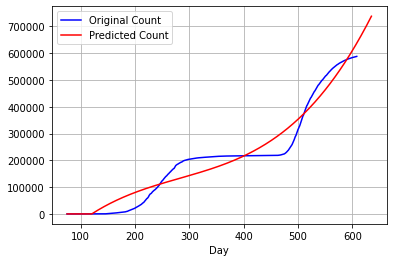

In [422]:
mo=PolynomialFeatures(degree=3)
new2=mo.fit_transform(new1,new['Bihar'])
xbr=mo.transform(x1)
br=linear_model.LinearRegression()
br.fit(new2,new['Bihar'])
ybr=br.predict(xbr)
plt.plot(new['Date'],new['Bihar'],color='blue',label='Original Count')
for i in range(len(ybr)):
    if ybr[i]<0:
        if i==0:
            ybr[i]=0
        else:
            ybr[i]=ybr[i-1]
plt.plot(x1,ybr,color='red',label='Predicted Count')
plt.grid()
plt.xlabel('Day')
plt.legend(loc='upper left')
plt.savefig('/content/br.png')
plt.show()

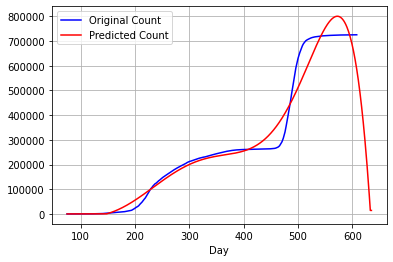

In [423]:
mo=PolynomialFeatures(degree=7)
new2=mo.fit_transform(new1,new['Chandigarh'])
xch=mo.transform(x1)
ch=linear_model.LinearRegression()
ch.fit(new2,new['Chandigarh'])
ych=ch.predict(xch)
plt.plot(new['Date'],new['Chandigarh'],color='blue',label='Original Count')
for i in range(len(yan)):
    if ych[i]<0:
        if i==0:
            ych[i]=0
        else:
            ych[i]=ych[i-1]
plt.plot(x1,ych,color='red',label='Predicted Count')
plt.grid()
plt.xlabel('Day')
plt.legend(loc='upper left')
plt.savefig('/content/ch.png')
plt.show()

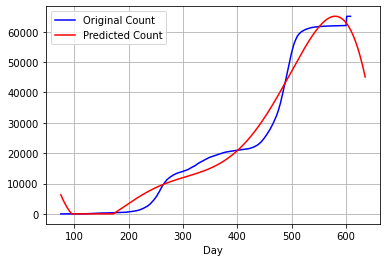

In [424]:
mo=PolynomialFeatures(degree=5)
new2=mo.fit_transform(new1,new['Chattisgarh'])
xct=mo.transform(x1)
ct=linear_model.LinearRegression()
ct.fit(new2,new['Chattisgarh'])
yct=ct.predict(xct)
plt.plot(new['Date'],new['Chattisgarh'],color='blue',label='Original Count')
for i in range(len(yct)):
    if yct[i]<0:
        if i==0:
            yct[i]=0
        else:
            yct[i]=yct[i-1]
plt.plot(x1,yct,color='red',label='Predicted Count')
plt.grid()
plt.xlabel('Day')
plt.legend(loc='upper left')
plt.savefig('/content/ct.png')
plt.show()

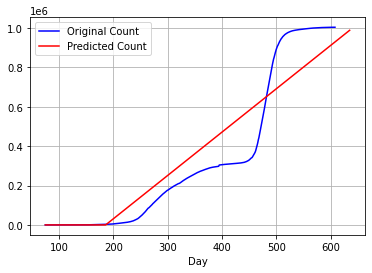

In [425]:
mo=PolynomialFeatures(degree=1)
new2=mo.fit_transform(new1,new['Daman & Diu'])
xdd=mo.transform(x1)
dd=linear_model.LinearRegression()
dd.fit(new2,new['Daman & Diu'])
ydd=dd.predict(xdd)
plt.plot(new['Date'],new['Daman & Diu'],color='blue',label='Original Count')
for i in range(len(ydd)):
    if ydd[i]<0:
        if i==0:
            ydd[i]=0
        else:
            ydd[i]=ydd[i-1]
plt.plot(x1,ydd,color='red',label='Predicted Count')
plt.grid()
plt.xlabel('Day')
plt.legend(loc='upper left')
plt.savefig('/content/dd.png')
plt.show()

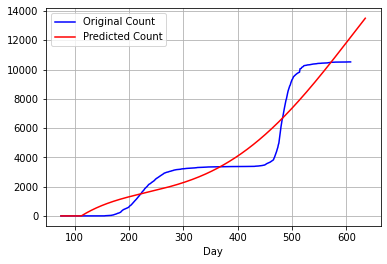

In [426]:
mo=PolynomialFeatures(degree=4)
new2=mo.fit_transform(new1,new['Delhi'])
xdl=mo.transform(x1)
dl=linear_model.LinearRegression()
dl.fit(new2,new['Delhi'])
ydl=dl.predict(xdl)
plt.plot(new['Date'],new['Delhi'],color='blue',label='Original Count')
for i in range(len(ydl)):
    if ydl[i]<0:
        if i==0:
            ydl[i]=0
        else:
            ydl[i]=ydl[i-1]
plt.plot(x1,ydl,color='red',label='Predicted Count')
plt.grid()
plt.xlabel('Day')
plt.legend(loc='upper left')
plt.savefig('/content/dl.png')
plt.show()

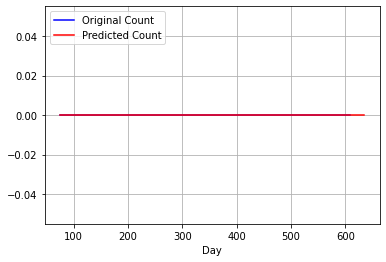

In [427]:
mo=PolynomialFeatures(degree=3)
new2=mo.fit_transform(new1,new['Dardar and Nagar Haveli'])
xdn=mo.transform(x1)
dn=linear_model.LinearRegression()
dn.fit(new2,new['Dardar and Nagar Haveli'])
ydn=dn.predict(xdn)
plt.plot(new['Date'],new['Dardar and Nagar Haveli'],color='blue',label='Original Count')
for i in range(len(ydn)):
    if ydn[i]<0:
        if i==0:
            ydn[i]=0
        else:
            ydn[i]=ydn[i-1]
plt.plot(x1,ydn,color='red',label='Predicted Count')
plt.grid()
plt.xlabel('Day')
plt.legend(loc='upper left')
plt.savefig('/content/dn.png')
plt.show()

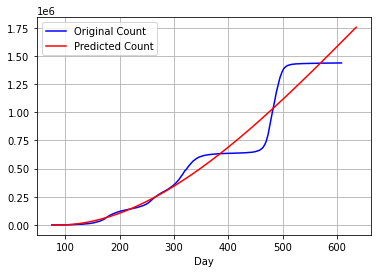

In [428]:
mo=PolynomialFeatures(degree=3)
new2=mo.fit_transform(new1,new['Goa'])
xga=mo.transform(x1)
ga=linear_model.LinearRegression()
ga.fit(new2,new['Goa'])
yga=ga.predict(xga)
plt.plot(new['Date'],new['Goa'],color='blue',label='Original Count')
for i in range(len(yga)):
    if yga[i]<0:
        if i==0:
            yga[i]=0
        else:
            yga[i]=yga[i-1]
plt.plot(x1,yga,color='red',label='Predicted Count')
plt.grid()
plt.xlabel('Day')
plt.legend(loc='upper left')
plt.savefig('/content/ga.png')
plt.show()

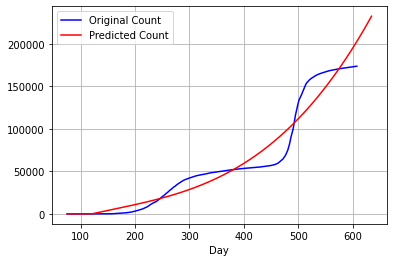

In [429]:
mo=PolynomialFeatures(degree=3)
new2=mo.fit_transform(new1,new['Gujarath'])
xgj=mo.transform(x1)
gj=linear_model.LinearRegression()
gj.fit(new2,new['Gujarath'])
ygj=gj.predict(xgj)
plt.plot(new['Date'],new['Gujarath'],color='blue',label='Original Count')
for i in range(len(ygj)):
    if ygj[i]<0:
        if i==0:
            ygj[i]=0
        else:
            ygj[i]=ygj[i-1]
plt.plot(x1,ygj,color='red',label='Predicted Count')
plt.grid()
plt.xlabel('Day')
plt.legend(loc='upper left')
plt.savefig('/content/gj.png')
plt.show()

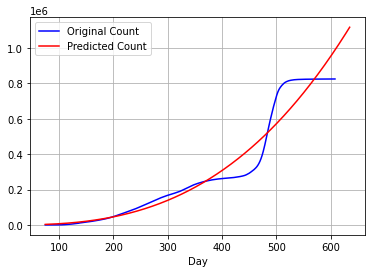

In [430]:
mo=PolynomialFeatures(degree=3)
new2=mo.fit_transform(new1,new['Himachal Pradesh'])
xhp=mo.transform(x1)
hp=linear_model.LinearRegression()
hp.fit(new2,new['Himachal Pradesh'])
yhp=hp.predict(xhp)
plt.plot(new['Date'],new['Himachal Pradesh'],color='blue',label='Original Count')
for i in range(len(yhp)):
    if yhp[i]<0:
        if i==0:
            yhp[i]=0
        else:
            yhp[i]=yhp[i-1]
plt.plot(x1,yhp,color='red',label='Predicted Count')
plt.grid()
plt.xlabel('Day')
plt.legend(loc='upper left')
plt.savefig('/content/hp.png')
plt.show()

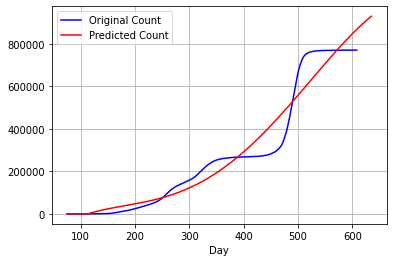

In [431]:
mo=PolynomialFeatures(degree=4)
new2=mo.fit_transform(new1,new['Haryana'])
xhr=mo.transform(x1)
hr=linear_model.LinearRegression()
hr.fit(new2,new['Haryana'])
yhr=hr.predict(xhr)
plt.plot(new['Date'],new['Haryana'],color='blue',label='Original Count')
for i in range(len(yhr)):
    if yhr[i]<0:
        if i==0:
            yhr[i]=0
        else:
            yhr[i]=yhr[i-1]
plt.plot(x1,yhr,color='red',label='Predicted Count')
plt.grid()
plt.xlabel('Day')
plt.legend(loc='upper left')
plt.savefig('/content/hr.png')
plt.show()

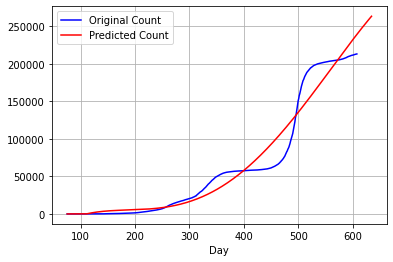

In [432]:
mo=PolynomialFeatures(degree=4)
new2=mo.fit_transform(new1,new['Jarkhand'])
xjh=mo.transform(x1)
jh=linear_model.LinearRegression()
jh.fit(new2,new['Jarkhand'])
yjh=jh.predict(xjh)
plt.plot(new['Date'],new['Jarkhand'],color='blue',label='Original Count')
for i in range(len(yjh)):
    if yjh[i]<0:
        if i==0:
            yjh[i]=0
        else:
            yjh[i]=yjh[i-1]
plt.plot(x1,yjh,color='red',label='Predicted Count')
plt.grid()
plt.xlabel('Day')
plt.legend(loc='upper left')
plt.savefig('/content/jh.png')
plt.show()

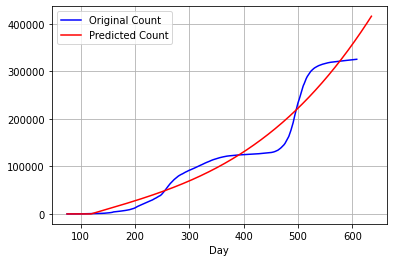

In [433]:
mo=PolynomialFeatures(degree=3)
new2=mo.fit_transform(new1,new['Jammu And Kashmir'])
xjk=mo.transform(x1)
jk=linear_model.LinearRegression()
jk.fit(new2,new['Jammu And Kashmir'])
yjk=jk.predict(xjk)
plt.plot(new['Date'],new['Jammu And Kashmir'],color='blue',label='Original Count')
for i in range(len(yjk)):
    if yjk[i]<0:
        if i==0:
            yjk[i]=0
        else:
            yjk[i]=yjk[i-1]
plt.plot(x1,yjk,color='red',label='Predicted Count')
plt.grid()
plt.xlabel('Day')
plt.legend(loc='upper left')
plt.savefig('/content/jk.png')
plt.show()

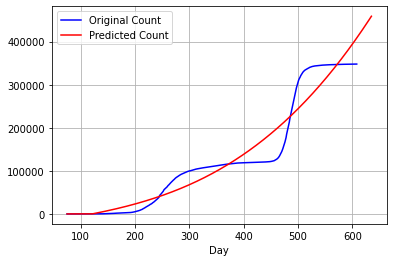

In [434]:
mo=PolynomialFeatures(degree=3)
new2=mo.fit_transform(new1,new['Karnataka'])
xka=mo.transform(x1)
ka=linear_model.LinearRegression()
ka.fit(new2,new['Karnataka'])
yka=ka.predict(xka)
plt.plot(new['Date'],new['Karnataka'],color='blue',label='Original Count')
for i in range(len(yka)):
    if yka[i]<0:
        if i==0:
            yka[i]=0
        else:
            yka[i]=yka[i-1]
plt.plot(x1,yka,color='red',label='Predicted Count')
plt.grid()
plt.xlabel('Day')
plt.legend(loc='upper left')
plt.savefig('/content/ka.png')
plt.show()

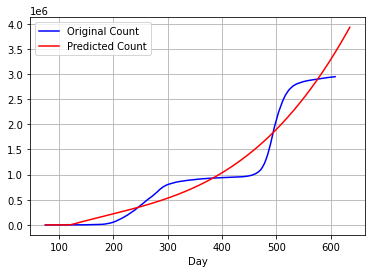

In [435]:
mo=PolynomialFeatures(degree=3)
new2=mo.fit_transform(new1,new['Kerala'])
xkl=mo.transform(x1)
kl=linear_model.LinearRegression()
kl.fit(new2,new['Kerala'])
ykl=kl.predict(xkl)
plt.plot(new['Date'],new['Kerala'],color='blue',label='Original Count')
for i in range(len(ykl)):
    if ykl[i]<0:
        if i==0:
            ykl[i]=0
        else:
            ykl[i]=ykl[i-1]
plt.plot(x1,ykl,color='red',label='Predicted Count')
plt.grid()
plt.xlabel('Day')
plt.legend(loc='upper left')
plt.savefig('/content/kl.png')
plt.show()

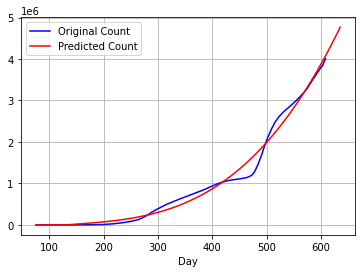

In [436]:
mo=PolynomialFeatures(degree=3)
new2=mo.fit_transform(new1,new['Ladakh'])
xla=mo.transform(x1)
la=linear_model.LinearRegression()
la.fit(new2,new['Ladakh'])
yla=la.predict(xla)
plt.plot(new['Date'],new['Ladakh'],color='blue',label='Original Count')
for i in range(len(yla)):
    if yla[i]<0:
        if i==0:
            yla[i]=0
        else:
            yla[i]=yla[i-1]
plt.plot(x1,yla,color='red',label='Predicted Count')
plt.grid()
plt.xlabel('Day')
plt.legend(loc='upper left')
plt.savefig('/content/la.png')
plt.show()

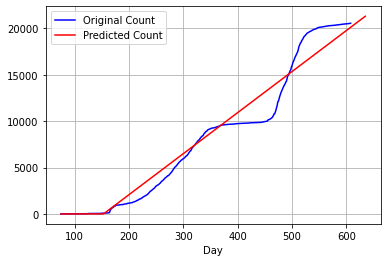

In [437]:
mo=PolynomialFeatures(degree=1)
new2=mo.fit_transform(new1,new['Lakshwadeep'])
xld=mo.transform(x1)
ld=linear_model.LinearRegression()
ld.fit(new2,new['Lakshwadeep'])
yld=ld.predict(xld)
plt.plot(new['Date'],new['Lakshwadeep'],color='blue',label='Original Count')
for i in range(len(yld)):
    if yld[i]<0:
        if i==0:
            yld[i]=0
        else:
            yld[i]=yld[i-1]
plt.plot(x1,yld,color='red',label='Predicted Count')
plt.grid()
plt.xlabel('Day')
plt.legend(loc='upper left')
plt.savefig('/content/ld.png')
plt.show()

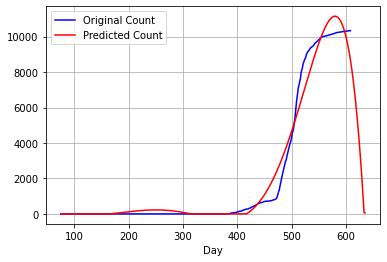

In [438]:
mo=PolynomialFeatures(degree=9)
new2=mo.fit_transform(new1,new['Maharashtra'])
xmh=mo.transform(x1)
mh=linear_model.LinearRegression()
mh.fit(new2,new['Maharashtra'])
ymh=mh.predict(xmh)
plt.plot(new['Date'],new['Maharashtra'],color='blue',label='Original Count')
for i in range(len(ymh)):
    if ymh[i]<0:
        if i==0:
            ymh[i]=0
        else:
            ymh[i]=ymh[i-1]
plt.plot(x1,ymh,color='red',label='Predicted Count')
plt.grid()
plt.xlabel('Day')
plt.legend(loc='upper left')
plt.savefig('/content/mh.png')
plt.show()

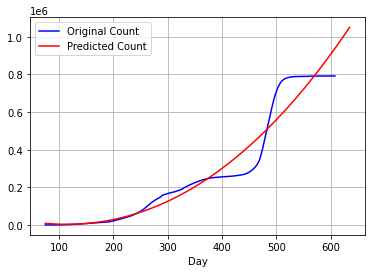

In [439]:
mo=PolynomialFeatures(degree=3)
new2=mo.fit_transform(new1,new['Meghalaya'])
xml=mo.transform(x1)
ml=linear_model.LinearRegression()
ml.fit(new2,new['Meghalaya'])
yml=ml.predict(xml)
plt.plot(new['Date'],new['Meghalaya'],color='blue',label='Original Count')
for i in range(len(yml)):
    if yml[i]<0:
        if i==0:
            yml[i]=0
        else:
            yml[i]=yml[i-1]
plt.plot(x1,yml,color='red',label='Predicted Count')
plt.grid()
plt.xlabel('Day')
plt.legend(loc='upper left')
plt.savefig('/content/ml.png')
plt.show()

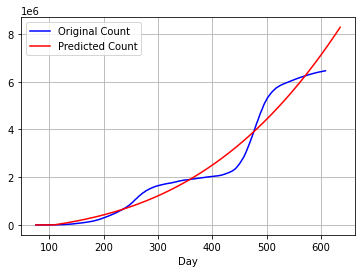

In [440]:
mo=PolynomialFeatures(degree=3)
new2=mo.fit_transform(new1,new['Manipur'])
xmn=mo.transform(x1)
mn=linear_model.LinearRegression()
mn.fit(new2,new['Manipur'])
ymn=mn.predict(xmn)
plt.plot(new['Date'],new['Manipur'],color='blue',label='Original Count')
for i in range(len(ymn)):
    if ymn[i]<0:
        if i==0:
            ymn[i]=0
        else:
            ymn[i]=ymn[i-1]
plt.plot(x1,ymn,color='red',label='Predicted Count')
plt.grid()
plt.xlabel('Day')
plt.legend(loc='upper left')
plt.savefig('/content/mn.png')
plt.show()

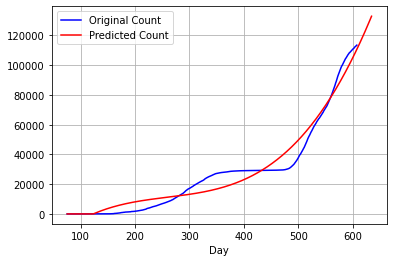

In [441]:
mo=PolynomialFeatures(degree=3)
new2=mo.fit_transform(new1,new['Madhya Pradesh'])
xmp=mo.transform(x1)
mp=linear_model.LinearRegression()
mp.fit(new2,new['Madhya Pradesh'])
ymp=mp.predict(xmp)
plt.plot(new['Date'],new['Madhya Pradesh'],color='blue',label='Original Count')
for i in range(len(ymp)):
    if ymp[i]<0:
        if i==0:
            ymp[i]=0
        else:
            ymp[i]=ymp[i-1]
plt.plot(x1,ymp,color='red',label='Predicted Count')
plt.grid()
plt.xlabel('Day')
plt.legend(loc='upper left')
plt.savefig('/content/mp.png')
plt.show()

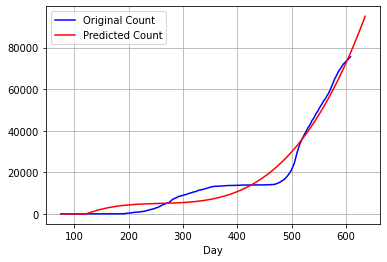

In [442]:
mo=PolynomialFeatures(degree=3)
new2=mo.fit_transform(new1,new['Mizoram'])
xmz=mo.transform(x1)
mz=linear_model.LinearRegression()
mz.fit(new2,new['Mizoram'])
ymz=mz.predict(xmz)
plt.plot(new['Date'],new['Mizoram'],color='blue',label='Original Count')
for i in range(len(ymz)):
    if ymz[i]<0:
        if i==0:
            ymz[i]=0
        else:
            ymz[i]=ymz[i-1]
plt.plot(x1,ymz,color='red',label='Predicted Count')
plt.grid()
plt.xlabel('Day')
plt.legend(loc='upper left')
plt.savefig('/content/mz.png')
plt.show()

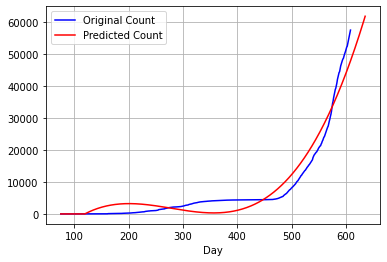

In [443]:
mo=PolynomialFeatures(degree=3)
new2=mo.fit_transform(new1,new['Nagaland'])
xnl=mo.transform(x1)
nl=linear_model.LinearRegression()
nl.fit(new2,new['Nagaland'])
ynl=nl.predict(xnl)
plt.plot(new['Date'],new['Nagaland'],color='blue',label='Original Count')
for i in range(len(ynl)):
    if ynl[i]<0:
        if i==0:
            ynl[i]=0
        else:
            ynl[i]=ynl[i-1]
plt.plot(x1,ynl,color='red',label='Predicted Count')
plt.grid()
plt.xlabel('Day')
plt.legend(loc='upper left')
plt.savefig('/content/nl.png')
plt.show()

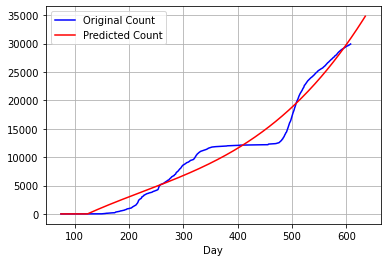

In [444]:
mo=PolynomialFeatures(degree=3)
new2=mo.fit_transform(new1,new['Orissa'])
xor1=mo.transform(x1)
or1=linear_model.LinearRegression()
or1.fit(new2,new['Orissa'])
yor1=or1.predict(xor1)
plt.plot(new['Date'],new['Orissa'],color='blue',label='Original Count')
for i in range(len(yor1)):
    if yor1[i]<0:
        if i==0:
            yor1[i]=0
        else:
            yor1[i]=yor1[i-1]
plt.plot(x1,yor1,color='red',label='Predicted Count')
plt.grid()
plt.xlabel('Day')
plt.legend(loc='upper left')
plt.savefig('/content/or.png')
plt.show()

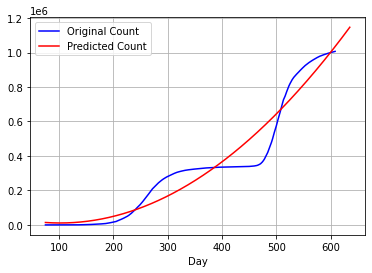

In [445]:
mo=PolynomialFeatures(degree=2)
new2=mo.fit_transform(new1,new['Punjab'])
xpb=mo.transform(x1)
pb=linear_model.LinearRegression()
pb.fit(new2,new['Punjab'])
ypb=pb.predict(xpb)
plt.plot(new['Date'],new['Punjab'],color='blue',label='Original Count')
for i in range(len(ypb)):
    if ypb[i]<0:
        if i==0:
            ypb[i]=0
        else:
            ypb[i]=ypb[i-1]
plt.plot(x1,ypb,color='red',label='Predicted Count')
plt.grid()
plt.xlabel('Day')
plt.legend(loc='upper left')
plt.savefig('/content/pb.png')
plt.show()

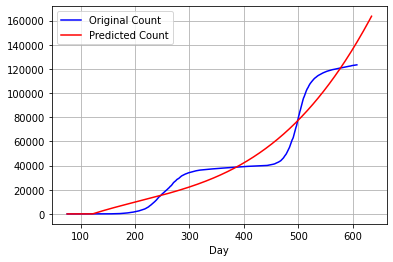

In [446]:
mo=PolynomialFeatures(degree=3)
new2=mo.fit_transform(new1,new['Pondicherry'])
xpy=mo.transform(x1)
py=linear_model.LinearRegression()
py.fit(new2,new['Pondicherry'])
ypy=py.predict(xpy)
plt.plot(new['Date'],new['Pondicherry'],color='blue',label='Original Count')
for i in range(len(ypy)):
    if ypy[i]<0:
        if i==0:
            ypy[i]=0
        else:
            ypy[i]=ypy[i-1]
plt.plot(x1,ypy,color='red',label='Predicted Count')
plt.grid()
plt.xlabel('Day')
plt.legend(loc='upper left')
plt.savefig('/content/py.png')
plt.show()

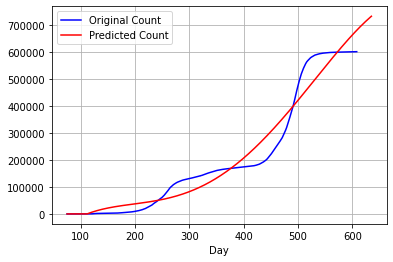

In [447]:
mo=PolynomialFeatures(degree=4)
new2=mo.fit_transform(new1,new['Rajasthan'])
xrj=mo.transform(x1)
rj=linear_model.LinearRegression()
rj.fit(new2,new['Rajasthan'])
yrj=rj.predict(xrj)
plt.plot(new['Date'],new['Rajasthan'],color='blue',label='Original Count')
for i in range(len(yrj)):
    if yrj[i]<0:
        if i==0:
            yrj[i]=0
        else:
            yrj[i]=yrj[i-1]
plt.plot(x1,yrj,color='red',label='Predicted Count')
plt.grid()
plt.xlabel('Day')
plt.legend(loc='upper left')
plt.savefig('/content/rj.png')
plt.show()

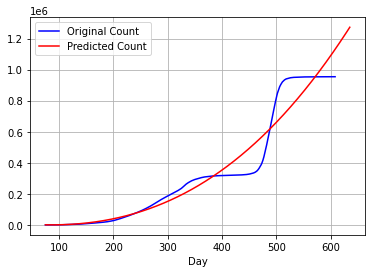

In [448]:
mo=PolynomialFeatures(degree=3)
new2=mo.fit_transform(new1,new['Sikkim'])
xsk=mo.transform(x1)
sk=linear_model.LinearRegression()
sk.fit(new2,new['Sikkim'])
ysk=sk.predict(xsk)
plt.plot(new['Date'],new['Sikkim'],color='blue',label='Original Count')
for i in range(len(ysk)):
    if ysk[i]<0:
        if i==0:
            ysk[i]=0
        else:
            ysk[i]=ysk[i-1]
plt.plot(x1,ysk,color='red',label='Predicted Count')
plt.grid()
plt.xlabel('Day')
plt.legend(loc='upper left')
plt.savefig('/content/sk.png')
plt.show()

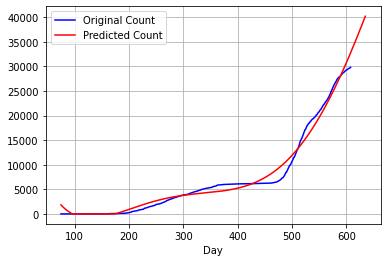

In [449]:
#x1=(np.arange(61,255)).reshape(-1,1)
mo=PolynomialFeatures(degree=5)
new2=mo.fit_transform(new1,new['Telangana'])
xtg=mo.transform(x1)
tg=linear_model.LinearRegression()
tg.fit(new2,new['Telangana'])
ytg=tg.predict(xtg)
plt.plot(new['Date'],new['Telangana'],color='blue',label='Original Count')
for i in range(len(ytg)):
    if ytg[i]<0:
        if i==0:
            ytg[i]=0
        else:
            ytg[i]=ytg[i-1]
plt.plot(x1,ytg,color='red',label='Predicted Count')
plt.grid()
plt.xlabel('Day')
plt.legend(loc='upper left')
plt.savefig('/content/tg.png')
plt.show()

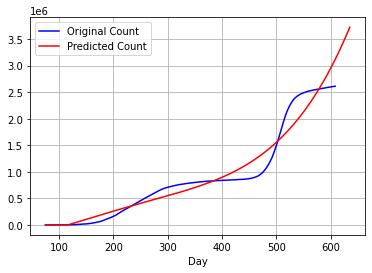

In [450]:
mo=PolynomialFeatures(degree=4)
new2=mo.fit_transform(new1,new['TamilNadu'])
xtn=mo.transform(x1)
tn=linear_model.LinearRegression()
tn.fit(new2,new['TamilNadu'])
ytn=tn.predict(xtn)
plt.plot(new['Date'],new['TamilNadu'],color='blue',label='Original Count')
for i in range(len(ytn)):
    if ytn[i]<0:
        if i==0:
            ytn[i]=0
        else:
            ytn[i]=ytn[i-1]
plt.plot(x1,ytn,color='red',label='Predicted Count')
plt.grid()
plt.xlabel('Day')
plt.legend(loc='upper left')
plt.savefig('/content/tn.png')
plt.show()

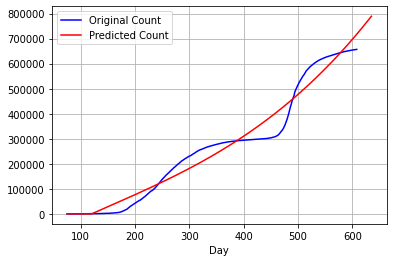

In [451]:
mo=PolynomialFeatures(degree=3)
new2=mo.fit_transform(new1,new['Tripura'])
xtr=mo.transform(x1)
tr=linear_model.LinearRegression()
tr.fit(new2,new['Tripura'])
ytr=tr.predict(xtr)
plt.plot(new['Date'],new['Tripura'],color='blue',label='Original Count')
for i in range(len(ytr)):
    if ytr[i]<0:
        if i==0:
            ytr[i]=0
        else:
            ytr[i]=ytr[i-1]
plt.plot(x1,ytr,color='red',label='Predicted Count')
plt.grid()
plt.xlabel('Day')
plt.legend(loc='upper left')
plt.savefig('/content/tr.png')
plt.show()

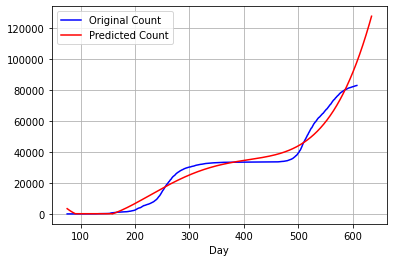

In [452]:
mo=PolynomialFeatures(degree=4)
new2=mo.fit_transform(new1,new['UttarPradesh'])
xup=mo.transform(x1)
up=linear_model.LinearRegression()
up.fit(new2,new['UttarPradesh'])
yup=up.predict(xup)
plt.plot(new['Date'],new['UttarPradesh'],color='blue',label='Original Count')
for i in range(len(yup)):
    if yup[i]<0:
        if i==0:
            yup[i]=0
        else:
            yup[i]=yup[i-1]
plt.plot(x1,yup,color='red',label='Predicted Count')
plt.grid()
plt.xlabel('Day')
plt.legend(loc='upper left')
plt.savefig('/content/up.png')
plt.show()

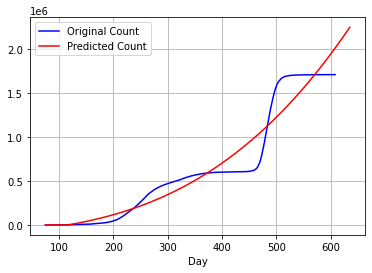

In [453]:
mo=PolynomialFeatures(degree=3)
new2=mo.fit_transform(new1,new['Uttarakand'])
xut=mo.transform(x1)
ut=linear_model.LinearRegression()
ut.fit(new2,new['Uttarakand'])
yut=ut.predict(xut)
plt.plot(new['Date'],new['Uttarakand'],color='blue',label='Original Count')
for i in range(len(yut)):
    if yut[i]<0:
        if i==0:
            yut[i]=0
        else:
            yut[i]=yut[i-1]
plt.plot(x1,yut,color='red',label='Predicted Count')
plt.grid()
plt.xlabel('Day')
plt.legend(loc='upper left')
plt.savefig('/content/ut.png')
plt.show()

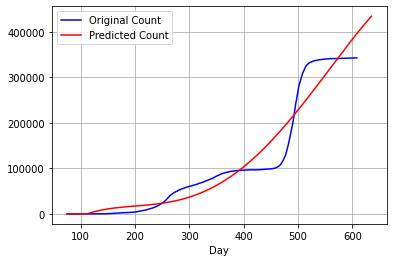

In [454]:
mo=PolynomialFeatures(degree=4)
new2=mo.fit_transform(new1,new['WestBengal'])
xwb=mo.transform(x1)
wb=linear_model.LinearRegression()
wb.fit(new2,new['WestBengal'])
ywb=wb.predict(xwb)
plt.plot(new['Date'],new['WestBengal'],color='blue',label='Original Count')
for i in range(len(ywb)):
    if ywb[i]<0:
        if i==0:
            ywb[i]=0
        else:
            ywb[i]=ywb[i-1]
plt.plot(x1,ywb,color='red',label='Predicted Count')
plt.grid()
plt.xlabel('Day')
plt.legend(loc='upper left')
plt.savefig('/content/wb.png')
plt.show()

In [455]:
lis=[an,ap,ar,as1,br,ch,ct,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or1,pb,py,rj,sk,tg,tn,tr,tt,up,ut,wb]

In [456]:
col=new.columns

In [457]:
cols=[]
for i in range(len(lis)):
    cols.append(col[i+1])
    cols.append(lis[i])

In [458]:
ytt[0]

0.0

In [459]:
len(ytt)

561

In [460]:
stna=['Date','an','ap','ar','as','br','ch','ct','dd','dl','dn','ga','gj','hp','hr','jh','jk','ka','kl','la','ld','mh','ml','mn','mp','mz','nl','or','pb','py','rj','sk','tg','tn','tr','up','ut','wb','tt']

In [461]:
def date(a):
    print(a)
    st=''
    if a<92:
        st=str(a-60)+'-Mar-20'
        return st
    if a<122:
        st=str(a-91)+'-Apr-20'
        return st
    if a<153:
        st=str(a-121)+'-May-20'
        return st
    if a<184:
        st=str(a-152)+'-Jun-20'
        return st
    if a<214:
        st=str(a-183)+'-Jul-20'
        return st
    if a<234:
        st=str(a-213)+'-Aug-20'
        return st
    if a<264:
        st=str(a-233)+'-Sep-20'
    if a<579:
        st=str(a-549)+'JUL-21'
    if a<611:
        st=str(a-549)+'Aug-21'
    else:
      st=str(a-611)+'Sep-21'



In [462]:
def getDate(today):
    dd = today[8:10];
    mm = today[5:7]
    yyyy = today[0:4]
    # print(dd+" "+mm+" " + yyyy)
    month = {"01":"Jan", "02":"Feb", "03":"Mar","04": "Apr","05" :"May","06" :"Jun","07": "Jul","08":"Aug","09" :"Sep","10": "Oct", "11":"Nov", "12":"Dec"}
    d=""
    d = dd + '-' + month[mm] + '-' + yyyy[-2:]
    # print(d)
    return d;


In [463]:
def gDate(today):
    dd = today[0:2];
    mm = today[3:5]
    yyyy = today[6:10]
    print(dd+" "+mm+" " + yyyy)
    month = {"01":"Jan", "02":"Feb", "03":"Mar","04": "Apr","05" :"May","06" :"Jun","07": "Jul","08":"Aug","09" :"Sep","10": "Oct", "11":"Nov", "12":"Dec"}
    d=""
    d = dd + '-' + month[mm] + '-' + yyyy[-2:]
    # print(d)
    return d;

In [464]:
listd=[]
last=""
exlis=['30-08-2021','31-08-2021','01-09-2021' ,'02-09-2021','03-09-2021','04-09-2021','05-09-2021', '06-09-2021','07-09-2021','08-09-2021', '09-09-2021','10-09-2021', '11-09-2021', '12-09-2021' , '13-09-2021', '14-09-2021', '15-09-2021', '16-09-2021', '17-09-2021','18-09-2021','19-09-2021','20-09-2021', '21-09-2021', '22-09-2021', '23-09-2021', '24-09-2021', '25-09-2021', '26-09-2021', '27-09-2021', '28-09-2021', '29-09-2021', '30-09-2021']
for i in range(563):
    if(i<=533):
      abc=getDate(org['Date_YMD'][i])
      a=1
    else:
      print(i)
      abc=gDate(exlis[30-(563-i)])
    print(i,abc)
    listd.append(abc)
    last=org['Date_YMD'][533]
    

0 14-Mar-20
1 15-Mar-20
2 16-Mar-20
3 17-Mar-20
4 18-Mar-20
5 19-Mar-20
6 20-Mar-20
7 21-Mar-20
8 22-Mar-20
9 23-Mar-20
10 24-Mar-20
11 25-Mar-20
12 26-Mar-20
13 27-Mar-20
14 28-Mar-20
15 29-Mar-20
16 30-Mar-20
17 31-Mar-20
18 01-Apr-20
19 02-Apr-20
20 03-Apr-20
21 04-Apr-20
22 05-Apr-20
23 06-Apr-20
24 07-Apr-20
25 08-Apr-20
26 09-Apr-20
27 10-Apr-20
28 11-Apr-20
29 12-Apr-20
30 13-Apr-20
31 14-Apr-20
32 15-Apr-20
33 16-Apr-20
34 17-Apr-20
35 18-Apr-20
36 19-Apr-20
37 20-Apr-20
38 21-Apr-20
39 22-Apr-20
40 23-Apr-20
41 24-Apr-20
42 25-Apr-20
43 26-Apr-20
44 27-Apr-20
45 28-Apr-20
46 29-Apr-20
47 30-Apr-20
48 01-May-20
49 02-May-20
50 03-May-20
51 04-May-20
52 05-May-20
53 06-May-20
54 07-May-20
55 08-May-20
56 09-May-20
57 10-May-20
58 11-May-20
59 12-May-20
60 13-May-20
61 14-May-20
62 15-May-20
63 16-May-20
64 17-May-20
65 18-May-20
66 19-May-20
67 20-May-20
68 21-May-20
69 22-May-20
70 23-May-20
71 24-May-20
72 25-May-20
73 26-May-20
74 27-May-20
75 28-May-20
76 29-May-20
77 30-May

In [465]:
len(listd)

563

In [466]:
print(listd[140])

01-Aug-20


In [467]:
ytt[140]-ytt[139]

-30.780352829620824

In [468]:
print(len(yan),len(yap),len(listd))

561 561 563


In [469]:
updated=pd.DataFrame({ 'Date':listd[2:] ,'Andaman And Nicobar':yan, 'Andhra Pradesh':yap, 'Arunachal Pradesh':yar,
       'Assam':yas1, 'Bihar':ybr, 'Chandigarh':ych, 'Chattisgarh':yct, 'Daman & Diu':ydd, 'Delhi':ydl,
       'Dardra and Nagar Haveli':ydn, 'Goa':yga, 'Gujarath':ygj, 'Himachal Pradesh':yhp,
       'Haryana':yhr, 'Jarkhand':yjh, 'Jammu And Kashmir':yjk, 'Karnataka':yka, 'Kerala':ykl,
       'Ladakh':yla, 'Lakshwadeep':yld, 'Maharashtra':ymh, 'Meghalaya':yml, 'Manipur':ymn,
       'Madhya Pradesh':ymp, 'Mizoram':ymz, 'Nagaland':ynl, 'Orissa':yor1, 'Punjab':ypb,
       'Pondicherry':ypy, 'Rajasthan':yrj, 'Sikkim':ysk, 'Telangana':ytg, 'TamilNadu':ytn,
       'Tripura':ytr, 'UttarPradesh':yup, 'Uttarakand':yut, 'WestBengal':ywb, 'India':ytt})

In [470]:
upc=updated.columns
for i in range(1,len(upc)):
    l1=list(updated[upc[i]])
    l1=list(map(int,l1))
    updated[upc[i]]=l1

In [471]:
for i in range(1,len(upc)):
    l1=list(updated[upc[i]])
    for j in range(5):
        if l1[j]>10:
            l1[j]=0
    updated[upc[i]]=l1

In [472]:
updated.head(20)

,Date,Andaman And Nicobar,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chandigarh,Chattisgarh,Daman & Diu,Delhi,Dardra and Nagar Haveli,Goa,Gujarath,Himachal Pradesh,Haryana,Jarkhand,Jammu And Kashmir,Karnataka,Kerala,Ladakh,Lakshwadeep,Maharashtra,Meghalaya,Manipur,Madhya Pradesh,Mizoram,Nagaland,Orissa,Punjab,Pondicherry,Rajasthan,Sikkim,Telangana,TamilNadu,Tripura,UttarPradesh,Uttarakand,WestBengal,India
0,16-Mar-20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,17-Mar-20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,18-Mar-20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19-Mar-20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,20-Mar-20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,21-Mar-20,0,0,201955,2197,0,0,4332,0,0,0,0,0,3549,0,0,0,0,0,0,0,0,7266,0,0,0,0,0,13122,0,0,464,1287,0,0,2129,0,0,0
6,22-Mar-20,0,0,184720,2027,0,0,3971,0,0,0,0,0,3673,0,0,0,0,0,0,0,0,7039,0,0,0,0,0,12950,0,0,430,1187,0,0,1899,0,0,0
7,23-Mar-20,0,0,168010,1861,0,0,3621,0,0,0,0,0,3801,0,0,0,0,0,0,0,0,6820,0,0,0,0,0,12786,0,0,402,1089,0,0,1677,0,0,0
8,24-Mar-20,0,0,151818,1700,0,0,3282,0,0,0,0,0,3931,0,0,0,0,0,0,0,0,6607,0,0,0,0,0,12630,0,0,380,994,0,0,1461,0,0,0
9,25-Mar-20,0,0,136136,1543,0,0,2954,0,0,0,0,0,4065,0,0,0,0,0,0,0,0,6400,0,0,0,0,0,12482,0,0,362,902,0,0,1252,0,0,0


In [473]:
updated.to_csv('/content/updated1.csv',index=False)

In [474]:
date(120)

120


'29-Apr-20'

In [475]:
abc=updated
abc['Date'][1]

'17-Mar-20'

In [476]:
f=open('predict1.json','w')

f.writelines('[\n')
for i in range(2,len(updated['Date'])):
    f.writelines('		{\n')
    f.writelines('			"'+upc[0]+'" : "'+str(updated['Date'][i])+'",\n')
    k=len(upc)
    for j in range(1,len(upc)-2):
        t=upc[j]
        f.writelines('			"'+stna[j]+'" :'+str(updated[t][i-2])+',\n')
    t=upc[k-1]
    f.writelines('			"'+stna[k-1]+'" :'+str(updated[t][i-2])+'\n')   

    if i==len(updated['Date'])-1:
        f.writelines('		}\n')
    else:
        f.writelines('		},\n')
f.writelines('   ]\n')
f.close()